In [48]:
# Импорт необходимых библиотек.
import sqlite3
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Пути до файлов.
folder = os.getcwd()

sql_folder = fr'{folder}\SQL'

files_folder = fr'{folder}\files'
if not os.path.exists(files_folder):
    os.mkdir(files_folder)

db_folder = fr'{folder}\db'
if not os.path.exists(db_folder):
    os.mkdir(db_folder)

db = fr'{folder}\db\testDB.sqlite3'

# Создание подключения к БД.
conn = sqlite3.connect(db)


In [49]:
# SQL запрос для получения продаж из таблицы "Счета".
# Считаю, что, если есть оплаченный счет, то была подтвержденная продажа.
# Сам SQL запрос можно посмотреть в соответствующей папке.
# Берем только одну категорию продукта - "Бухгалтерия.Контур".
sql_sales = fr'{sql_folder}\sales.sql'
sales = open(sql_sales).read()

# Создаем датафрейм, помещаем в него результат выполнения SQL запроса.
df_sales = pd.read_sql_query(sales, conn)
# Преобразуем дату выставления счета и оплаты счета в тип "дата".
df_sales[['BDate', 'PayDate']] = df_sales[['BDate', 'PayDate']].apply(pd.to_datetime)

# Выделяем из даты выставления счета соответствующий месяц для анализа.
df_sales['month_bill'] = df_sales['BDate'].dt.month

# Выделяем из даты выставления счета соответствующий год для анализа.
df_sales['year_bill'] = df_sales['BDate'].dt.year

# Выделяем из даты оплаты счета соответствующий месяц для анализа.
# Заменяем пустые значения на 0.
# Преобразуем к типу "int".
df_sales['month_pay'] = df_sales['PayDate'].dt.month
df_sales['month_pay'].fillna(0, inplace=True)
df_sales['month_pay'] = df_sales['month_pay'].astype('int64')

# Выделяем из даты оплаты счета соответствующий год для анализа.
# Заменяем пустые значения на 0.
# Преобразуем к типу "int".
df_sales['year_pay'] = df_sales['PayDate'].dt.year
df_sales['year_pay'].fillna(0, inplace=True)
df_sales['year_pay'] = df_sales['year_pay'].astype('int64')


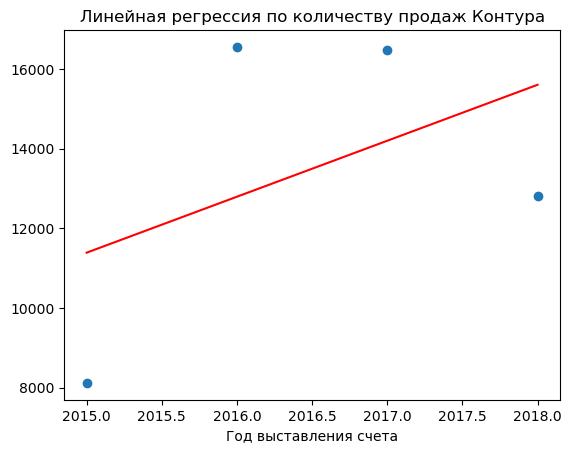

In [59]:
df_sales.head()
df_count_by_bill_year = df_sales[['Cost', 'year_bill']].groupby('year_bill')['year_bill'].agg('count')

new = pd.DataFrame({'year':df_count_by_bill_year.index, 'count':df_count_by_bill_year.values})
x = new['year'].values.reshape(-1, 1)
y = new['count'].values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(x, y)
y_pred = linear_regressor.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.title('Линейная регрессия по количеству продаж Контура')
plt.ticklabel_format(style = 'plain', axis='y')
plt.xlabel('Год выставления счета', horizontalalignment='center')
plt.show()
